In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# 1. Load the MNIST dataset
# Fetch the MNIST dataset (28x28 images of digits 0-9)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # The pixel values of the images
y = mnist.target.astype(int)  # The corresponding labels (digits 0-9)

In [16]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int32

In [29]:
import pandas as pd

# Assuming X and Y are your DataFrames
# Combine them side by side
combined_df = pd.concat([X, y], axis=1)

# Display the combined DataFrame
combined_df.to_csv("MNIST_784.csv",index=False)

In [32]:
data = pd.read_csv("MNIST_784.csv")
print(len(data))
data.head()

70000


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


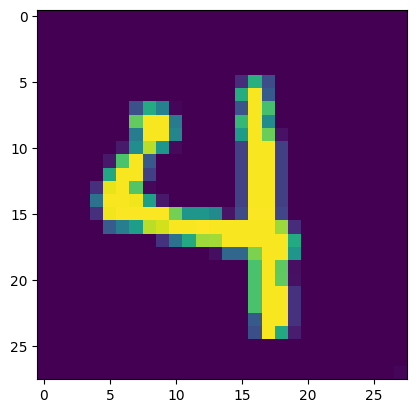

In [48]:
plt.imshow(data.iloc[18306,1:].values.reshape(28,28))

In [6]:
# 2. Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
# 3. Apply PCA to reduce the dimensionality
pca = PCA(n_components=70)  # Reduce to 50 components
X_pca = pca.fit_transform(X_scaled)

In [21]:
X_pca

array([[-0.89171985, -4.9297109 , -0.09303758, ..., -0.14718638,
         0.81380659, -2.44721289],
       [ 8.81353003, -7.51756046, -3.71418494, ..., -1.43198992,
         0.25435169,  0.72458327],
       [ 2.20483541,  9.82446089, -5.75248779, ..., -1.64977223,
         3.09774914,  1.86447835],
       ...,
       [-5.22259497, -1.18431579, -4.75472539, ..., -0.79835358,
        -1.27583956,  1.0957817 ],
       [-2.17772858, -6.99503251, -3.2287368 , ..., -2.28046332,
         0.72951289,  0.91208642],
       [11.77787167, -5.40298122,  2.32272519, ...,  0.89453872,
        -2.58229815,  3.58584097]])

In [22]:
np.shape(X_pca)

(70000, 70)

In [23]:
# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [24]:
# 5. Train a Logistic Regression classifier on the reduced data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [25]:
# 6. Make predictions on the test set
y_pred = clf.predict(X_test)

In [26]:
# 7. Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression classifier on PCA-reduced data: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression classifier on PCA-reduced data: 91.07%


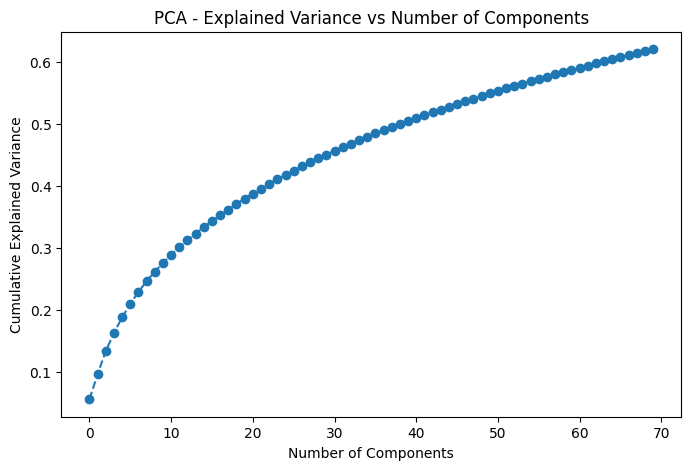

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.show()


## Without PCA

In [18]:
# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Train a Logistic Regression classifier on the reduced data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [19]:
# 6. Make predictions on the test set
y_pred = clf.predict(X_test)

# 7. Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression classifier on PCA-reduced data: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression classifier on PCA-reduced data: 91.36%


### LDA

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 components for visualization
X_lda = lda.fit_transform(X_scaled, y)


# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)


# 5. Train a Logistic Regression classifier on the LDA-reduced data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)


# 6. Make predictions on the test set
y_pred = clf.predict(X_test)

In [35]:
# 7. Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression classifier on LDA-reduced data: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression classifier on LDA-reduced data: 55.20%


In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)  # Reduce to 2 components for visualization
X_lda = lda.fit_transform(X_scaled, y)


# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)


# 5. Train a Logistic Regression classifier on the LDA-reduced data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)


# 6. Make predictions on the test set
y_pred = clf.predict(X_test)

# 7. Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression classifier on LDA-reduced data: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression classifier on LDA-reduced data: 73.99%


In [43]:
np.shape(X_lda)

(70000, 3)

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=9)  # Reduce to 9 components for visualization
X_lda = lda.fit_transform(X_scaled, y)


# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)


# 5. Train a Logistic Regression classifier on the LDA-reduced data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)


# 6. Make predictions on the test set
y_pred = clf.predict(X_test)

# 7. Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression classifier on LDA-reduced data: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression classifier on LDA-reduced data: 89.01%


## t-Distributed Stochastic Neighbor Embedding:

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


'''# 1. Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # The pixel values of the images
y = mnist.target.astype(int)  # The corresponding labels (digits 0-9)


# 2. Standardize the data (important for most dimensionality reduction techniques)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)'''

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)


# 5. Train a Logistic Regression classifier on the t-SNE reduced data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)


# 6. Make predictions on the test set
y_pred = clf.predict(X_test)


# 7. Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression classifier on t-SNE-reduced data: {accuracy * 100:.2f}%')


Accuracy of Logistic Regression classifier on t-SNE-reduced data: 86.59%


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


'''# 1. Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # The pixel values of the images
y = mnist.target.astype(int)  # The corresponding labels (digits 0-9)


# 2. Standardize the data (important for most dimensionality reduction techniques)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)'''

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)


# 5. Train a Logistic Regression classifier on the t-SNE reduced data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)


# 6. Make predictions on the test set
y_pred = clf.predict(X_test)


# 7. Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression classifier on t-SNE-reduced data: {accuracy * 100:.2f}%')


Accuracy of Logistic Regression classifier on t-SNE-reduced data: 84.65%


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


'''# 1. Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # The pixel values of the images
y = mnist.target.astype(int)  # The corresponding labels (digits 0-9)


# 2. Standardize the data (important for most dimensionality reduction techniques)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)'''

tsne = TSNE(n_components=4, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)


# 5. Train a Logistic Regression classifier on the t-SNE reduced data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)


# 6. Make predictions on the test set
y_pred = clf.predict(X_test)


# 7. Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression classifier on t-SNE-reduced data: {accuracy * 100:.2f}%')

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.